This is one of the 100 recipes of the IPython Cookbook, the definitive guide to high-performance scientific computing and data science in Python.  It has been lighrtly edited for expository purposes.

## 8.5. Using Support Vector Machines for classification tasks

Let's do some imports.

In [13]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.svm as svm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We generate 2D points and assign a binary label according to a linear operation on the coordinates.

In [14]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

The label is True ("positive") if the sum of the two corrdinates is greater than 1; otherwise False.  This is an easy linear problem.

In [20]:
print X.shape, X[0,0], X[0,1]
print y[0]

(200, 2) 0.563451414508 -0.295347832853
False


The values of the coordinates for the first item X[0,:] are shown, as well as the label, computed by the rule given above,

We now fit a linear **Support Vector Classifier** (SVC). This classifier tries to find a line (a line here, more generally a hyperplane) that separates the True labels from the False labels.  Otherwise put, we train the classifier.
The output opf training is a decision function that tells us how close to the line we are (close to the boundary means a low-confidence decision).  Positive decision values mean True, Negative decision values mean False.

In [16]:
est = svm.LinearSVC()
est.fit(X, y);

For visualization purposes only (specifically, to use the contour plot below), 
we manipulate the data into a "mesh grid"
shape.  We're going to plot decisions for 250000 points in a 250x250 rectangle.
To do that we'll cast the decision results in the same 250x250 meshgrid shape.

In [21]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# Flatten the meshgrid so the decision function can operate on the points in it
Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Put the results back in meshgrid form.
Z = Z.reshape(xx.shape)

In [23]:
print xx.shape,Z.shape
print 'Two sample points in the grid, first the x-ordinates, then the y'

print xx[0,0], xx[1,0], xx[0,1],xx[1,1]
print yy[0,0], yy[1,0], yy[0,1],yy[1,1]

print 'Now the value of the decision function for those points.  It will be a high positive number for high-confidence positive decisions.'
print 'It will have a low absolute value (near 0) for low-confidence decisions.'
print 'It will change each time you run this notebook, because a new set of random points is chosen on each run.'
print Z[0,0], Z[0,1], Z[1,0], Z[1,1]
print 'The real shape of the data in table form is 250000 2 D points, a 250000x2 array'
print np.c_[xx.ravel(),yy.ravel()].shape

(500, 500) (500, 500)
Two sample points in the grid, first the x-ordinates, then the y
-3.0 -3.0 -2.9879759519 -2.9879759519
-3.0 -2.9879759519 -3.0 -2.9879759519
Now the value of the decision function for those points.  It will be a high positive number for high-confidence positive decisions.
It will have a low absolute value (near 0) for low-confidence decisions.
It will change each time you run this notebook, because a new set of random points is chosen on each run.
-16.6072293984 -16.5790840047 -16.5781283469 -16.5499829532
The real shape of the data in table form is 250000 2 D points, a 250000x2 array
(250000, 2)


We define a function that displays the boundaries and decision function of a trained classifier.  The `scatter` function displays our points on the 2D grid we defined.  We show the regions of the grid where the decision surface `Z` has the highest values in dark blue with `imshow`, and we show the place where `Z` is 0 with the `contour` function, instructing it to draw a black line along the pointss where `z=0`.  The `scatter` function assigns a color to points as well.  Those for which the class value (`y`) is 1 are dark; those with class value 0 are light (open circles).  We draw dashed axis lies with the two `axhline` and `axvline` commands.

In [24]:
# This function takes a SVM estimator as input.
def plot_decision_function(est):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    # We display the decision function on the grid.
    plt.figure(figsize=(5,5));
    plt.imshow(Z,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap);
    # We display the boundary where Z = 0
    plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                colors='k');
    # All point colors c fall in the interval .5<=c<=1.0 on the blue colormap. We color the true points darker blue.
    plt.scatter(X[:, 0], X[:, 1], s=30, c=.5+.5*y, lw=1, 
                cmap=cmap, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--');
    plt.axvline(0, color='k', ls='--');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);

5) Let's take a look at the classification results with the linear SVC.

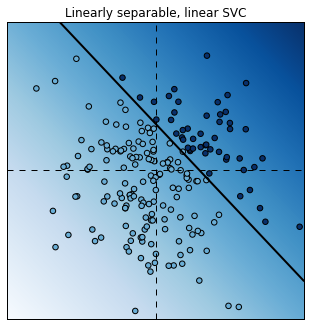

In [13]:
plot_decision_function(est);
plt.title("Linearly separable, linear SVC");

The linear SVC tried to separate the points with a line and it did a pretty good job.

We now modify the labels with a *XOR* function. A point's label is 1 if the coordinates have different signs. This classification is not linearly separable. Therefore, a linear SVC fails completely.

Score: 0.6


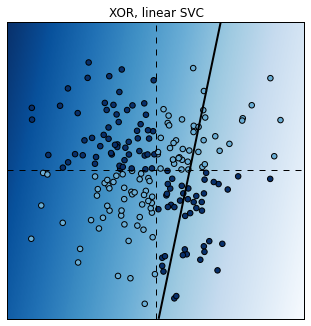

In [9]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# We train the classifier.
est = gs.GridSearchCV(svm.LinearSVC(), 
                      {'C': np.logspace(-3., 3., 10)});
est.fit(X, y);
print("Score: {0:.1f}".format(
      cv.cross_val_score(est, X, y).mean()))
# Plot the decision function.
plot_decision_function(est);
plt.title("XOR, linear SVC");

Fortunately, it is possible to use non-linear SVCs by using non-linear **kernels**. Kernels specify a non-linear transformation of the points into a higher-dimensional space. Transformed points in this space are assumed to be more linearly separable, although they are not necessarily in the original space. By default, the `SVC` classifier in scikit-learn uses the **Radial Basis Function** (RBF) kernel.

Score: 0.970


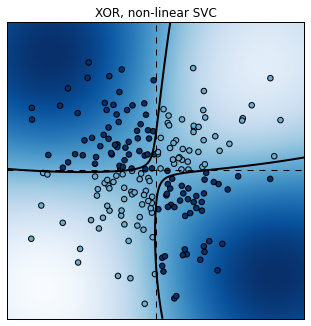

In [11]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
est = gs.GridSearchCV(svm.SVC(), 
                      {'C': np.logspace(-3., 3., 10),
                    'gamma': np.logspace(-3., 3., 10)});
est.fit(X, y);
print("Score: {0:.3f}".format(
      cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est.best_estimator_);
plt.title("XOR, non-linear SVC");

This time, the non-linear SVC does a pretty good job at classifying these non-linearly separable points.

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).